# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [97]:
# Se aplica el one-hot encoding.
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [98]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [100]:
# Se aplica el ordinal encoding.
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [101]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [102]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [103]:
# Se aplica el one-hot encoding.
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()

df_rs_ohe = scaler.fit_transform(df_ohe)
df_rs_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_rs_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [104]:
X = df_rs_ohe.drop(['price'], axis=1)
y = df_rs_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [105]:
# Se aplica el ordinal encoding.
oe2 = OrdinalEncoder()
df_oe2 = df.copy()
df_oe2[str_categ] = oe2.fit_transform(df_oe2[str_categ])

x2 = df_oe2.values #returns a numpy array
scaler = RobustScaler()
x2_scaled = scaler.fit_transform(x2)
df_scl_oe2 = pd.DataFrame(x2_scaled, columns=df_oe2.columns)
df_scl_oe2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X = df_scl_oe2.drop(['price'], axis=1)
y = df_scl_oe2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [107]:
# Se aplica el ordinal encoding.
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [108]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)

model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [109]:
# Se aplica el ordinal encoding.
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [110]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [111]:
# Se aplica el ordinal encoding.
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [112]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Análisis de los resultados

A raíz de lo observado en los 7 modelos creados, con las diferentes variaciones de cada uno, se obtuvieron los siguientes resultados:
- Modelo 1: Codificación One-Hot + MaxMinScaler

        RMSE: 0.031 , R^2: 0.917
        
- Modelo 2: Codificación Ordinal + MaxMinScaler

        RMSE: 0.05 , R^2: 0.787
                
- Modelo 3: Codificación One-Hot + RobustScaler

        RMSE: 0.277 , R^2: 0.917
                
- Modelo 4: Codificación Ordinal + RobustScaler

        RMSE: 0.444 , R^2: 0.787
                
- Modelo 5: Codificación Ordinal + MaxMinScaler + Entrenamiento con 30% de los datos

        RMSE: 0.049 , R^2: 0.785
                
- Modelo 6: Codificación Ordinal + MaxMinScaler + Entrenamiento con 55% de los datos

        RMSE: 0.05 , R^2: 0.784
                
- Modelo 7: Codificación Ordinal + MaxMinScaler + Entrenamiento con 80% de los datos

        RMSE: 0.05 , R^2: 0.787

Como se muestra anteriormente, se muestran dos métricas para verificar la calidad de los diferentes modelos usados. En específico, son el RMSE (Root Mean Squared Error) y el R^2.

Para el caso del RMSE, como su nombre lo indica, mide la raíz cuadrada del error cuarático medio. En otras palabras, mide que tan errados estan los datos predichos por el modelo con respecto a los datos reales. En el caso de esta métrica, se desea que su valor sea o este cerca de 0.

Por otro lado, la métrica R^2 indica que tan bueno es nuestro modelo con respecto a un modelo promedio(o hipotesis nula). En este caso, se desea que su valor sea o este cercano a 1, que indica que el modelo predice o se ajusta perfectamente a los datos.

De acuerdo a lo anterior, de los modelos usados en la Parte 1, se concluye que el mejor para los datos observados es el *Modelo 1 (Codificación One-Hot + MaxMinScaler)*, debido a que su RMSE es el más cercano a 0 y su R^2 es el más cercano a 1 de todos los experimentos realizados. 

Por otro lado, el peor modelo sería el *Modelo 4(Codificación Ordinal + RobustScaler)* por las razones opuestas a las mencionadas anteriormente (su RMSE es el más lejano de 0 y su R^2 es el más alejado de 1).

Lo anterior, como ya se dijo, es para estos datos en específico, ya que es posible que usar otros scalers o codificaciones sea mejor en otros conjuntos de datos. Por ello siempre es necesario hacer este tipo de experimentos para obtener los mejores ajustes para cada dataset en específico.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [64]:
# Se crea dos listas para guardar varios R2 de iteraciones del algoritmo. 
hist_r2_train = []
hist_r2_test = []

In [119]:
# Se crea el encoding one-hot.
df_ohe = pd.get_dummies(df)

# Se usa el RobustScaler para escalar los datos.
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

# Se separan los datos para su entrenamiento y posterior testeo.
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [120]:
import random

X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
w0 = np.random.rand(1,32)*0.0001 # Inicializar aleatoriamente. Se inicializa con valores pequeños #
w = w0.copy()

#Selección de par aleatorio
i = random.randrange(0, X_train_array.shape[0]-1) # Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]

#Inicialización de criterio de parada
eps = 1e-5 # Se define un criterio de parada, el cual fue seleccionado basado en el error en la predicción y la gráfica de convergencia del modelo despues de multiples iteraciones#
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #

#Inicialización de valor de la tasa de aprendizaje 
tasa =  0.0005 # Selección de tasa de aprendizaje. Fue seleccionada basada en el error y la gráfica de convergencia del modelo después de multiples iteraciones #

#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

In [121]:
#Ciclo iterativo según algoritmo de descenso de gradiente
while dif>eps:
    # Desarrollo de algoritmo #
    
    #Asignación de pesos a cada variable
    g = np.dot(w, np.transpose(xActual)) 
    #Comparación de modelo creado con datos reales
    error = g-yActual
    #Creación de siguiente vector de pesos
    w = w - tasa*(error*xActual)
    
    #Cálculo de la norma euclidiana (para el criterio de parada)
    norm_error = np.linalg.norm(error)
    if len(errores)>=1:
        # Se recalcula el criterio de parada (la diferencia entre los vectores de errores consecutivos)
        dif = abs(norm_error-errores[len(errores)-1])
    # Se añade a la lista de errores la norma del ultimo error calculado
    errores.append(norm_error)
    
    #Indice i aleatorio (estocástico) para actualizar xActual y Y¿yActual.
    i = random.randrange(0, X_train_array.shape[0]-1)
    #Se actualiza a un nuevo X de los datos de entrada
    xActual = X_train_array[i]
    #Se actualiza a un nuevo Y de los datos de entrada
    yActual = y_train_array[i]
    # # # # # # # # # # # # # # #
print("Done")

Done


#### Evaluación de Modelo

In [116]:
# Se calcula la columna objetivo(precio) con los datos separados para entrenamiento y con el modelo entrenado.
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

# Se calcula la columna objetivo(precio) con los datos separados para testear y con el modelo entrenado.
y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])

# Se calcula el r^2 score para ambos.
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)

# Se guardan los r2 en el historial.
hist_r2_train.append(r2_train)
hist_r2_test.append(r2_test)

print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8784
R2 prueba: 0.8733


In [95]:
round(np.mean(hist_r2_train),4), round(np.mean(hist_r2_test),4)

(0.8172, 0.8084)

### Análisis de R^2

Se corrió el modelo en repetidas ocaciones, y en cada iteración se guardó su R2, tanto para los valores predichos de entrenamiento, como para los de testeo. Ello en promedio resulto en un R2 de entrenamiento de 0.8172 y un R2 de prueba de 0.8084 (si no se observa en la columna de arriba es porque se perdieron los datos al volver a correr el modelo, se adjunta imagen comp prueba del experimento). Como se desea que el R2 sea cercano a 1, pues este explica qué tan bien se ajusta nuestro modelo respecto a un modelo promedio (hipotesis nula), se considera que con estos datos fue exitoso el experimento.
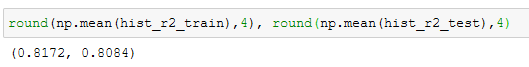

Por lo anterior, se concluye que para el modelo creado tiene un buen ajuste para los datos usados. En específico, como se trata de un caso de Machine Learning y de regresión lineal, tampoco se desea que los valores de R^2 sean demasiado altos debido a que puede haber un sobreajuste a los datos y, por tanto, no funcione muy bien el modelo para futuros datasets y predicciones. Estos valores de calidad igualmente pueden discutirse con las personas de negocio y entre los miembros del equipo y puede variar con el objetivo de cada experimento.

## Gráfica de Resultados

Primero se gráfica la función de error tal cual se recolectaron los datos en cada iteración. De esta no es posible extraer información importante a simple vista. Por ello, justo después, se puede observar una gráfica con el promedio móvil del error, cada 1000 iteraciones. 

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

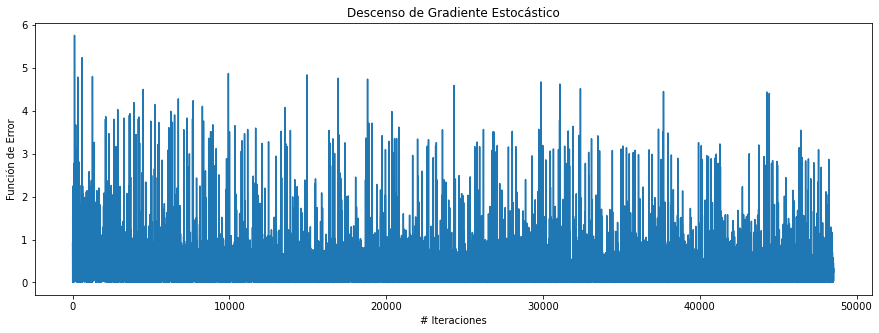

In [122]:
# Gráfica de los errores en las iteraciones
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

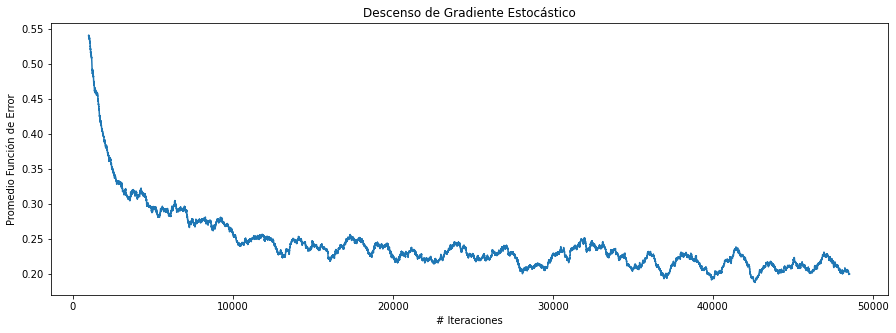

In [123]:
# Se calcula el promedio móvil
rll_avg = pd.DataFrame(errores).rolling(1000).mean()

# Se gráfica el resultado
plt.figure(figsize=(15,5))
plt.plot(rll_avg)
plt.xlabel('# Iteraciones')
plt.ylabel('Promedio Función de Error')
plt.title('Descenso de Gradiente Estocástico')

De esta gráfica si se puede observar que el error prómedio móvil disminuía a medida que las iteraciones de nuestro algoritmo, el cual era el objetivo al que se quería llegar. Además también es posible observar a raíz de ello que el algoritmo convergía y aumentaba en su precisión a medida que se desarrollaban sus iteraciones.

#### Taller desarrollado por: Daniel Martinez y Santiago Estupiñan